# Dual Momentum GEM
    
    (optimize lookback)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbols = {'SP500' : 'IVV',  'BONDS' : 'BND', 'EXUS' : 'VEU'}
symbols = {'SP500' : 'SPY',  'BONDS' : 'AGG', 'EXUS' : 'EFA'}

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2020, 1, 1)
# num months lookback
lookback = None

use_cache = True

Define Optimizations

In [4]:
# pick one
optimize_lookback = True

# define high low trade periods ranges
if optimize_lookback:
    Xs = range(3, 18+1, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print("{0}".format(X), end=" ")
    if optimize_lookback:
        strategies[X] = strategy.Strategy(symbols, capital, start, end, lookback=int(X),
                                          margin=1, use_cache=True, use_absolute_mom = True)
    strategies[X].run()
    strategies[X].rlog, strategies[X].tlog, strategies[X].dbal = strategies[X].get_logs()
    strategies[X].stats = strategies[X].get_stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,7.29,7.12,4.89,6.37,6.85,8.82,6.01,5.46,6.13,4.38,4.32,6.05,4.88,6.87,9.29,8.65
max_closed_out_drawdown,-22.93,-23.49,-37.26,-39.16,-34.17,-19.33,-33.43,-34.77,-29.89,-34.96,-35.60,-36.32,-39.38,-33.64,-22.44,-22.44
drawdown_annualized_return,-3.15,-3.30,-7.61,-6.15,-4.99,-2.19,-5.56,-6.37,-4.87,-7.98,-8.24,-6.00,-8.07,-4.90,-2.41,-2.60
drawdown_recovery,-1.06,-0.89,-2.15,-2.15,-1.51,-0.26,-0.09,-1.51,-2.22,-1.51,-1.51,-2.15,-1.51,-0.09,-0.94,-0.94
best_month,16.52,16.51,16.53,16.53,16.53,10.63,12.58,12.66,10.36,12.63,12.57,14.10,12.67,12.69,13.92,12.42
worst_month,-15.99,-15.98,-30.85,-30.75,-30.93,-15.97,-30.72,-30.87,-16.28,-30.81,-30.70,-30.86,-30.90,-30.91,-16.27,-16.28
sharpe_ratio,0.63,0.63,0.41,0.51,0.54,0.74,0.48,0.43,0.51,0.36,0.36,0.46,0.39,0.52,0.70,0.67
sortino_ratio,0.73,0.74,0.46,0.58,0.63,0.91,0.54,0.49,0.61,0.41,0.41,0.52,0.44,0.60,0.85,0.81
monthly_std,3.09,3.00,3.49,3.46,3.41,2.94,3.48,3.56,3.24,3.62,3.56,3.61,3.69,3.64,3.40,3.35
pct_time_in_market,91.82,94.61,96.83,95.67,97.88,97.39,96.80,97.47,98.53,99.02,99.02,99.02,99.51,99.51,99.51,99.51


Bar graphs

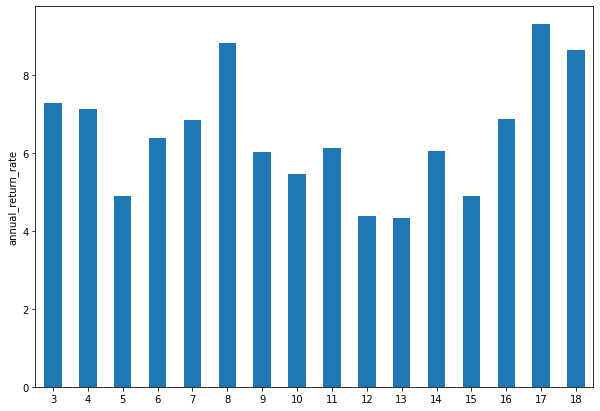

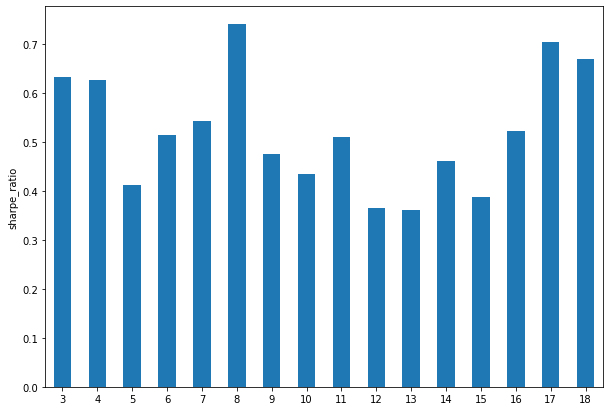

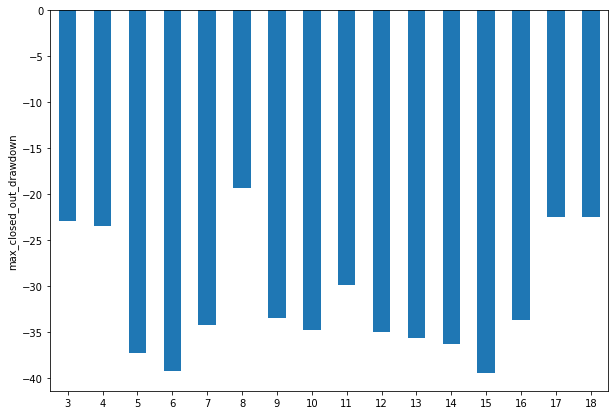

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2005-03-04 00:00:00 BUY  111 SPY @ 89.93
2020-07-27 00:00:00 SELL 111 SPY @ 323.22


Equity curve

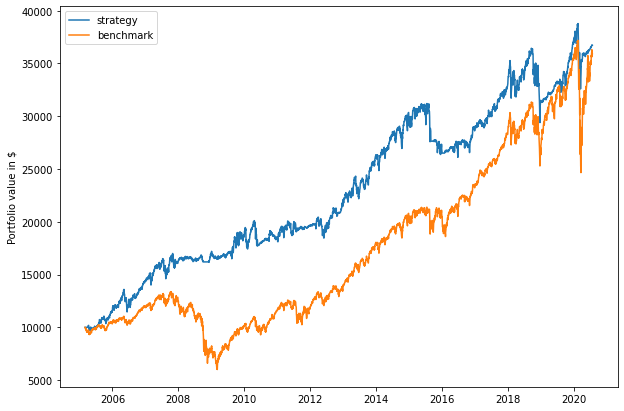

In [9]:
if optimize_lookback: Y = '8'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

In [10]:
def plot_equity_curves(strategies):
    """
    Plot Equity Curve: multiple equity curves on same plot
    Arguement is daily balance.
    """
    fig = plt.figure(figsize=(16,12))
    axes = fig.add_subplot(111, ylabel='Portfolio value in $')
    for strategy in strategies:
        axes.plot(strategy.dbal['close'], label=strategy.lookback)

    plt.legend(loc='best')

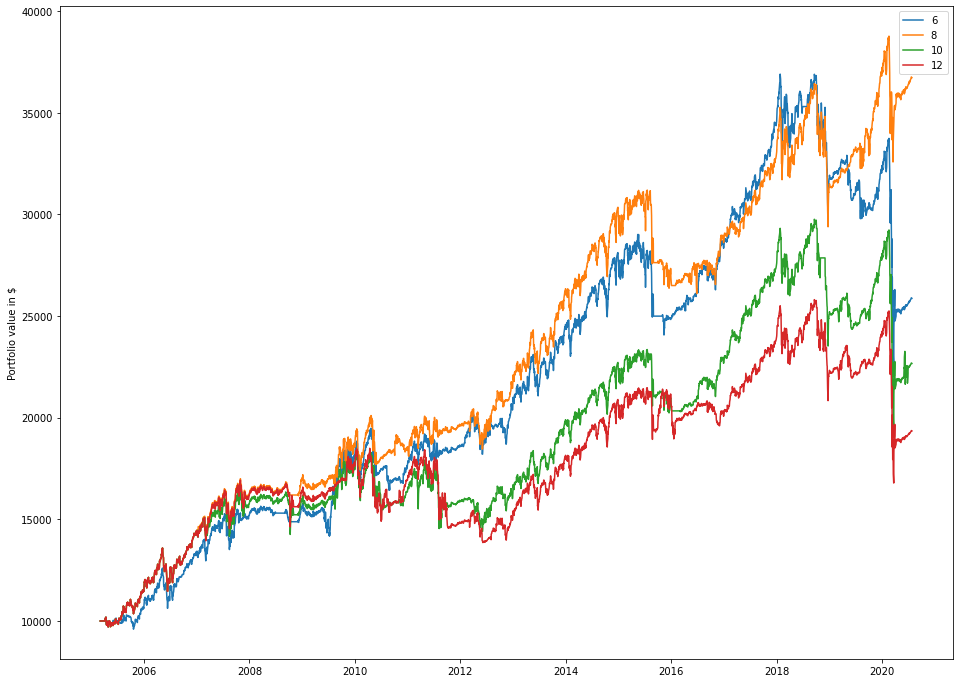

In [11]:
plot_equity_curves(strategies[3:10:2])